In [104]:
import cv2
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os 
from random import seed, randint
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [135]:
# IMG_DIR = './data/public/img/train/'
# ANN_DIR = './data/public/ann/train/'
IMG_DIR = './data_after_augmentation/img/'
ANN_DIR = './data_after_augmentation/ann/'

# AREA

In [136]:
def cal_area(lb):
    return np.sum(lb) / (lb.shape[0]*lb.shape[1])

In [137]:
data = {}

for name in os.listdir(IMG_DIR):
    if name[-4:]!='.jpg':
        continue
    img = cv2.imread(IMG_DIR + name)
    lb = cv2.imread(ANN_DIR + name[:-3]+'png')
    # print(img)
    # print(IMG_DIR + name, ANN_DIR + name)
    lb = cv2.cvtColor(lb, cv2.COLOR_BGR2GRAY).astype('float32')
    # cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data[name] = cal_area(lb)
    # fig, ax = plt.subplots(1,2)
    # ax[0].imshow(img)
    # ax[1].imshow(lb)

    # plt.show()

In [138]:
df = pd.DataFrame({'img_name': data.keys(),
                  'area': data.values()})
df.head()

,img_name,area
0,808c7c5f4e6520a6bd933a308c468e87.jpg,0.591150
1,270_7e36e8f7cc0cfc325e92e5245fee85d6.jpg,0.951037
2,90_a141682599baa3e824a82cf4b3bfa415.jpg,0.623651
3,270_5cc73b8497f398a2597f7df93e87e116.jpg,0.414014
4,270_b09e7c4e24ae5fd8c383791d7e84f276.jpg,0.243339


In [139]:
def cluster_area(area):
    for i in range(2 ,12,2):
        i /= 10
        if area <= i:
            return i
area_threshold = df['area'].map(cluster_area)
df['classify'] = area_threshold

In [140]:
df = df.sort_values(by= 'area', ascending= False)
df.head()

,img_name,area,classify
4022,90_1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0
2513,270_1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0
550,1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0
5690,3fcb517de61aefd14501ac8379f8fa47.jpg,0.984184,1.0
409,180_3fcb517de61aefd14501ac8379f8fa47.jpg,0.984184,1.0


In [145]:
print('area')
df['classify'].value_counts(sort= False)

area


classify
1.0     743
0.8    1748
0.6    2638
0.4    1401
0.2     755
Name: count, dtype: int64

In [119]:
def times_aug(x):
    if x in [1, 0.2]:
        return 2
    elif x == 0.8:
        return 1
    else:
        return
    
times_aug_col = df['classify'].map(times_aug)
df['times_aug_area'] = times_aug_col
df.dropna(axis=0, inplace= True)
df

,img_name,area,classify,times_aug_area
4022,90_1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0,2.0
2513,270_1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0,2.0
550,1fd1cb0a0c279c4ef09043300f12137f.jpg,1.000000,1.0,2.0
5690,3fcb517de61aefd14501ac8379f8fa47.jpg,0.984184,1.0,2.0
409,180_3fcb517de61aefd14501ac8379f8fa47.jpg,0.984184,1.0,2.0
...,...,...,...,...
1373,35fcd4f641cb707c41ca334d46e345fe.jpg,0.025942,0.2,2.0
6100,90_35fcd4f641cb707c41ca334d46e345fe.jpg,0.025942,0.2,2.0
6344,180_c5eca1c632952bed261d590a7e634611.jpg,0.021180,0.2,2.0
6939,c5eca1c632952bed261d590a7e634611.jpg,0.021180,0.2,2.0


In [120]:
# df[['img_name', 'times_aug_area']].to_csv('area_augmentation.csv')

# COLOR

In [121]:
img_list = sorted(os.listdir(IMG_DIR))
ann_list = sorted(os.listdir(ANN_DIR))
all_img_files = [os.path.join(IMG_DIR, file) for file in img_list]
all_ann_files = [os.path.join(ANN_DIR, file) for file in ann_list]

In [122]:
def cal_mean_masked_area(img_file, ann_file):
    img = cv2.imread(img_file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ann = cv2.imread(ann_file)
    img = img*ann
    img = img.transpose(2, 0, 1).reshape(3, -1)
    mean_R, mean_G, mean_B = np.mean(img, axis=1)/np.mean(img!=0)
    return img_file, ann_file, mean_R, mean_G, mean_B

In [123]:
result = []
for i in range(n_files):
    img_file = all_img_files[i]
    ann_file = all_ann_files[i]
    img_file, ann_file, mean_R, mean_G, mean_B = cal_mean_masked_area(img_file, ann_file)
    result.append([img_file[24:], ann_file[24:], mean_R, mean_G, mean_B])
len(result)

error: OpenCV(4.8.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [124]:
output = pd.DataFrame(result, columns =['img_name', 'ann_name', 'mean_R', 'mean_G', 'mean_B'])
output

,img_name,ann_name,mean_R,mean_G,mean_B


In [97]:
X = np.array(output.drop(['img_name', 'ann_name'], axis=1))
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto", max_iter=1000).fit(X)
print(kmeans.cluster_centers_)
output['classify'] = kmeans.labels_
output.info(), output['classify'].value_counts()

[[ 88.80685915 106.76446816  57.78620996]
 [138.72275216 141.62748759 103.07345383]
 [190.71115863 180.52270747 149.73778809]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   img_name  4322 non-null   object 
 1   ann_name  4322 non-null   object 
 2   mean_R    4322 non-null   float64
 3   mean_G    4322 non-null   float64
 4   mean_B    4322 non-null   float64
 5   classify  4322 non-null   int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 185.8+ KB


(None,
 classify
 0    2023
 1    1612
 2     687
 Name: count, dtype: int64)

/tmp/ipykernel_8444/479631717.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_0['mean_R'], cluster_0['mean_G'], cluster_0['mean_B'], c=c0/255., marker='o', label=f'Cluster 0: {c0}')
/tmp/ipykernel_8444/479631717.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(cluster_1['mean_R'], cluster_1['mean_G'], cluster_1['mean_B'], c=c1/255., marker='o', label=f'Cluster 1: {c1}')
/tmp/ipykernel_8

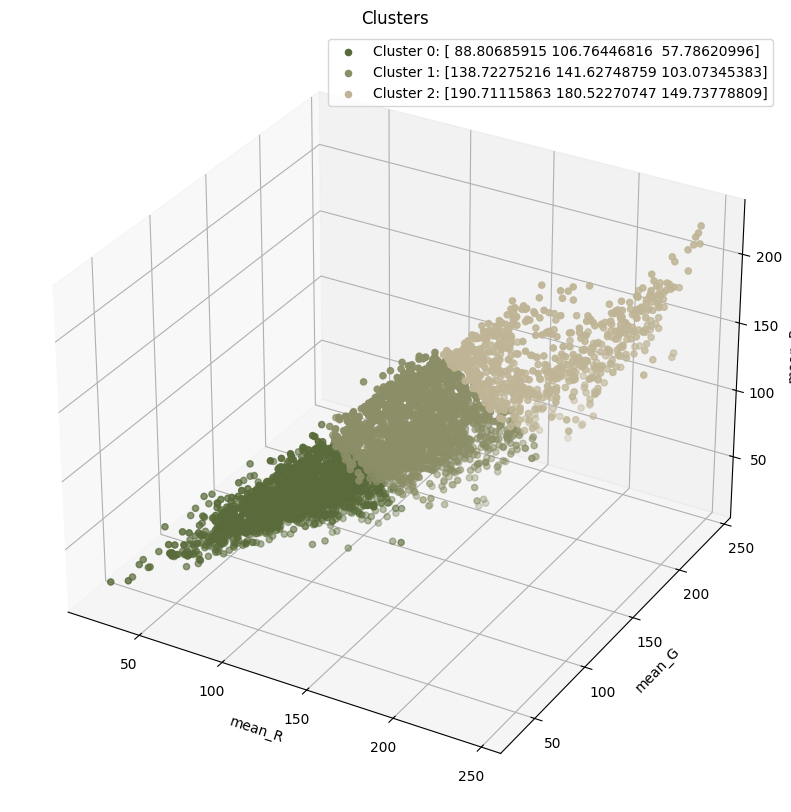

In [98]:
class_0 = output[output['classify'] == 0]
class_1 = output[output['classify'] == 1]
class_2 = output[output['classify'] == 2]

# plot 
cluster_0 = class_0.drop(['img_name', 'ann_name', 'classify'], axis = 1)
cluster_1 = class_1.drop(['img_name', 'ann_name', 'classify'], axis = 1)
cluster_2 = class_2.drop(['img_name', 'ann_name', 'classify'], axis = 1)
c0, c1, c2 = kmeans.cluster_centers_
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
ax.scatter(cluster_0['mean_R'], cluster_0['mean_G'], cluster_0['mean_B'], c=c0/255., marker='o', label=f'Cluster 0: {c0}')
ax.scatter(cluster_1['mean_R'], cluster_1['mean_G'], cluster_1['mean_B'], c=c1/255., marker='o', label=f'Cluster 1: {c1}')
ax.scatter(cluster_2['mean_R'], cluster_2['mean_G'], cluster_2['mean_B'], c=c2/255., marker='o', label=f'Cluster 2: {c2}')

# Set labels for each axis
ax.set_xlabel('mean_R')
ax.set_ylabel('mean_G')
ax.set_zlabel('mean_B')

# Set a title for the plot
ax.set_title('Clusters')

# Add a legend
ax.legend()

# Show the plot
plt.show()

In [99]:
output

,img_name,ann_name,mean_R,mean_G,mean_B,classify
0,001227c7aabb1b3bef1dedd7637e715f.jpg,001227c7aabb1b3bef1dedd7637e715f.png,152.103820,157.214538,93.145592,1
1,0013ef9ba1dc270322ae715b78692a49.jpg,0013ef9ba1dc270322ae715b78692a49.png,121.320345,139.581772,74.015751,1
2,001ac635ef288efcd55a87648c501f78.jpg,001ac635ef288efcd55a87648c501f78.png,145.741579,119.735288,93.705526,1
3,003418d64812702a483b2605f2d6b334.jpg,003418d64812702a483b2605f2d6b334.png,199.580219,189.858654,164.242611,2
4,00528c34c548446ace5e2c95524352ea.jpg,00528c34c548446ace5e2c95524352ea.png,163.801780,172.221613,116.773537,1
...,...,...,...,...,...,...
4317,ffb6b6ed6b7d3c01a3c4936c2a13ccde.jpg,ffb6b6ed6b7d3c01a3c4936c2a13ccde.png,127.041810,127.775194,104.923590,1
4318,ffb730a1680b071fe5debee564d4f6a6.jpg,ffb730a1680b071fe5debee564d4f6a6.png,63.884001,84.770217,38.885229,0
4319,ffdf65d9155f9c194cf7f0e160e7b245.jpg,ffdf65d9155f9c194cf7f0e160e7b245.png,149.504426,156.920743,115.127882,1
4320,ffe00be404132d04f35f49897f0f848f.jpg,ffe00be404132d04f35f49897f0f848f.png,75.420381,98.413629,48.219651,0


In [102]:
color_aug = output[output['classify'] == 2]
color_aug = color_aug.drop(['ann_name', 'classify', 'mean_R', 'mean_G', 'mean_B'], axis=1)
color_aug['times_aug_color'] = [1.0]*color_aug.shape[0]
color_aug

,img_name,times_aug_color
3,003418d64812702a483b2605f2d6b334.jpg,1.0
6,00ba6e5339894347e74e4c31e17546a9.jpg,1.0
47,0347ed48c9125511c2b99dfd1a3ed3f3.jpg,1.0
81,051896cc924a37769484fa427c1c3b6b.jpg,1.0
82,05261999b826f660dc0ffe08f89ab160.jpg,1.0
...,...,...
4265,fca7cf87f3bd3fda89c59c2607714e81.jpg,1.0
4290,fdcf29bd04b5fc6fb44b83eae86ea07e.jpg,1.0
4299,fe7a835e7d91bbdea038a8e4d1a816fa.jpg,1.0
4301,fe82a81de6d854b050b22247a4bf3a4d.jpg,1.0


In [103]:
# color_aug.to_csv('color_augmentation.csv')

# CONTRAST